In [1]:
!unzip exam_dataset.zip

Archive:  exam_dataset.zip
  inflating: Expanded_data_with_more_features.csv  
  inflating: Original_data_with_more_rows.csv  


In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('/content/Expanded_data_with_more_features.csv')

In [96]:
# 1
female = (df['Gender'] == 'female').sum()
male = (df['Gender'] == 'male').sum()
female, male

(15424, 15217)

In [122]:
# 2, 3
fem_percentage = (df['Gender'] == 'female').mean()
male_percentage = (df['Gender'] == 'male').mean()
f'{fem_percentage:%}', f'{male_percentage:%}'

('50.337783%', '49.662217%')

In [120]:
# 4, 5, 6
cols = ['MathScore', 'ReadingScore', 'WritingScore']
score_df = df.groupby('EthnicGroup')[cols].mean().reset_index()
list(zip(cols, score_df['EthnicGroup'][score_df[cols].idxmax()]))

[('MathScore', 'group E'),
 ('ReadingScore', 'group E'),
 ('WritingScore', 'group E')]

In [124]:
# 7, 8, 9
mean_math = df.loc[df["TestPrep"] == 'completed', "MathScore"].mean()
mean_read = df.loc[df["TestPrep"] == 'completed', "ReadingScore"].mean()
mean =  df.loc[df["TestPrep"] == 'completed', ['MathScore', 'ReadingScore', 'WritingScore']].mean().mean()
mean_math, mean_read, mean

(69.5466599698644, 73.73299849321948, 72.66097438473129)

In [90]:
# 10, 11
single = (df['ParentMaritalStatus'] == 'single').sum()
married = (df['ParentMaritalStatus'] == 'married').sum()
single, married

(7097, 16844)

In [84]:
# 12, 13
regullary_math = df.loc[df["PracticeSport"] == 'regularly', "MathScore"].mean()
never_math = df.loc[df["PracticeSport"] == 'never', "MathScore"].mean()

regullary_read = df.loc[df["PracticeSport"] == 'regularly', "ReadingScore"].mean()
never_read = df.loc[df["PracticeSport"] == 'never', "ReadingScore"].mean()
regullary_math > never_math, regullary_read > never_read

(True, True)

In [93]:
# 14, 15
bus = (df['TransportMeans'] == 'school_bus').sum()
private = (df['TransportMeans'] == 'private').sum()
bus, private

(16145, 11362)

# Classification

In [6]:
cols = [
    'Gender', 
    'EthnicGroup', 
    'ParentEduc', 
    'LunchType', 
    'ParentMaritalStatus', 
    'PracticeSport', 
    'IsFirstChild', 
    'NrSiblings',       
    'TransportMeans', 
    'WklyStudyHours', 
    'MathScore', 
    'ReadingScore', 
    'WritingScore'
]


In [20]:
df['IsTestCompleted'] = df['TestPrep'] == 'completed'

In [21]:
df[cols + ['IsTestCompleted']]

,Gender,EthnicGroup,ParentEduc,LunchType,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,IsTestCompleted
0,female,NaN,bachelor's degree,standard,married,regularly,yes,3.0,school_bus,< 5,71,71,74,False
1,female,group C,some college,standard,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,False
2,female,group B,master's degree,standard,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,False
3,male,group A,associate's degree,free/reduced,married,never,no,1.0,NaN,5 - 10,45,56,42,False
4,male,group C,some college,standard,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,False
30637,male,group E,high school,standard,single,regularly,no,1.0,private,5 - 10,58,53,51,False
30638,female,NaN,high school,free/reduced,married,sometimes,no,1.0,private,5 - 10,61,70,67,True
30639,female,group D,associate's degree,standard,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,True


In [57]:
num_features = [
    'MathScore', 
    'ReadingScore', 
    'WritingScore'
]
cat_features = [
    'Gender', 
    'EthnicGroup', 
    'ParentEduc', 
    'LunchType', 
    'ParentMaritalStatus', 
    'PracticeSport',
    'IsFirstChild',
    'TransportMeans',
    'WklyStudyHours',
    'NrSiblings'
]

In [70]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])



X = pipeline.fit_transform(df)
Y = df['IsTestCompleted'].values


In [72]:
cv = ShuffleSplit(n_splits=5, test_size=0.15)
cross_val_score(LogisticRegression(), X, Y, cv=cv).mean()

0.7514901022405918

In [73]:
model = LogisticRegression()
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.15)
model.fit(train_X, train_Y)

LogisticRegression()

In [74]:
model.score(test_X, test_Y)

0.7443985207744181

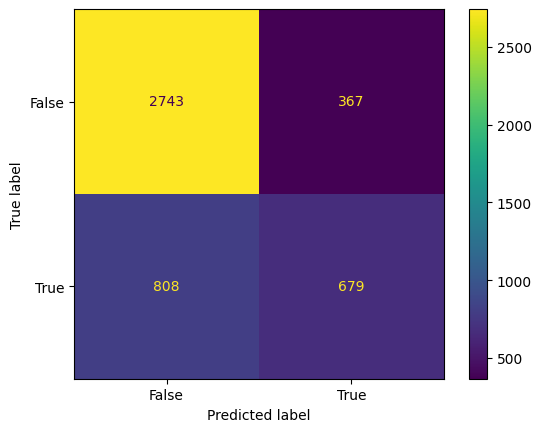

In [78]:
ConfusionMatrixDisplay(
    confusion_matrix(test_Y, model.predict(test_X)),
    display_labels=model.classes_
).plot()